In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("Admission_Predict_Ver1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [31]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(x)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496 

In [32]:
x.shape

(500, 7)

In [33]:
new_labels=pd.cut(np.array(y),3, labels =["unlikely", "probably", "likely"])

In [34]:
print(new_labels)

['likely', 'probably', 'probably', 'likely', 'probably', ..., 'likely', 'likely', 'likely', 'probably', 'likely']
Length: 500
Categories (3, object): ['unlikely' < 'probably' < 'likely']


In [35]:
standardized_data=StandardScaler().fit_transform(x)
standardized_data[:]

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [36]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(standardized_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [37]:
print(principalComponents)

[[-3.56837458 -0.32831807 -0.60867453 -0.5129757  -0.20164224]
 [-1.6391986   0.03455037  0.86723365 -0.10513976  0.20811014]
 [ 0.55099145 -0.72079379  0.94001376  0.06657673  0.22787045]
 ...
 [-3.91072426  0.25679799 -0.16708596 -0.23354642  0.40721697]
 [-0.24532695  2.13524981  0.802122   -0.26033638  0.3866439 ]
 [-1.87379066  1.5157913  -0.84565011 -0.28374201 -0.11838795]]


In [38]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.568375,-0.328318,-0.608675,-0.512976,-0.201642
1,-1.639199,0.034550,0.867234,-0.105140,0.208110
2,0.550991,-0.720794,0.940014,0.066577,0.227870
3,-0.345470,-1.280237,-0.390081,0.579390,-0.411583
4,2.035804,0.039366,-0.691749,-0.616976,0.423746


In [39]:
finalDf = np.vstack((principalDf.T, new_labels)).T
pca_df=pd.DataFrame(data = finalDf, columns = ('PC1','PC2','PC3','PC4','PC5', "Chance of Admit"))

In [40]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Chance of Admit
0,-3.568375,-0.328318,-0.608675,-0.512976,-0.201642,likely
1,-1.639199,0.03455,0.867234,-0.10514,0.20811,probably
2,0.550991,-0.720794,0.940014,0.066577,0.22787,probably
3,-0.34547,-1.280237,-0.390081,0.57939,-0.411583,likely
4,2.035804,0.039366,-0.691749,-0.616976,0.423746,probably


In [41]:
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 , 0.03766808])

In [42]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PC1              500 non-null    object
 1   PC2              500 non-null    object
 2   PC3              500 non-null    object
 3   PC4              500 non-null    object
 4   PC5              500 non-null    object
 5   Chance of Admit  500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


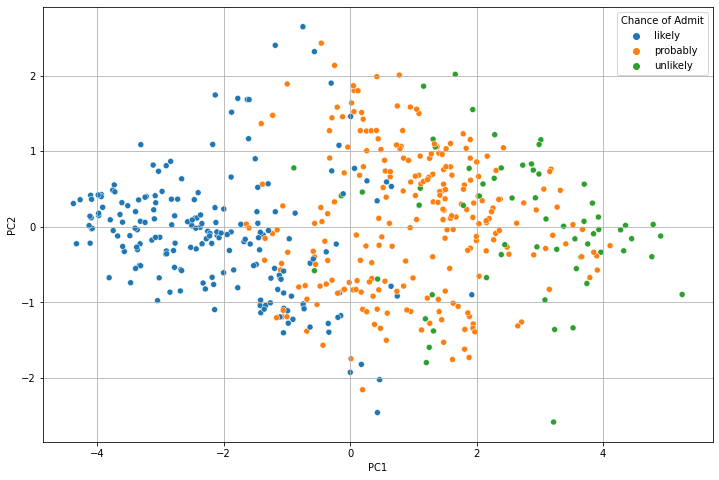

In [43]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 8)
sns.scatterplot(x="PC1", y="PC2", hue="Chance of Admit", data=pca_df)
#ax.legend(targets)
ax.grid()

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(principalComponents,y,test_size=0.25,random_state=10)


In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375,)
(125,)


In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=lr.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_train,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_pred)
print('mse=',mse)
print('mae=',mae)
print('rmse=',rmse)
print('R-2 Score=',r2)

mse= 0.004076945767701881
mae= 0.04683868320018297
rmse= 0.0638509652840259
R-2 Score= 0.8029443865963402


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('mse=',mse)
print('mae=',mae)
print('rmse=',rmse)
print('R-2 Score=',r2)

mse= 0.0034130020446040505
mae= 0.04157453703481573
rmse= 0.058420904174824706
R-2 Score= 0.8030780523700567


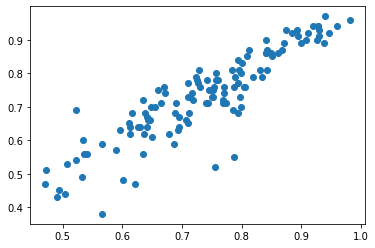

In [49]:
#Plotting actual vs predicted values
Sh=np.array([y_pred,y_test])

colors=np.array(['green','blue'])
plt.scatter(Sh[0],Sh[1],)
plt.show()

